### Importación de datos



In [114]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359


#1. Análisis de facturación



##vamos a sumar los valores de la columna precios de cada archivo para calcular el monto total de ingresos por cada tienda

In [115]:
ingreso_total_tienda1 = tienda1["Precio"].sum()
ingreso_total_tienda2 = tienda2["Precio"].sum()
ingreso_total_tienda3 = tienda3["Precio"].sum()
ingreso_total_tienda4 = tienda4["Precio"].sum()

print(f"El monto total de ingresos de la tienda 1 es: {ingreso_total_tienda1}")
print(f"El monto total de ingresos de la tienda 2 es: {ingreso_total_tienda2}")
print(f"El monto total de ingresos de la tienda 3 es: {ingreso_total_tienda3}")
print(f"El monto total de ingresos de la tienda 4 es: {ingreso_total_tienda4}")

El monto total de ingresos de la tienda 1 es: 1150880400.0
El monto total de ingresos de la tienda 2 es: 1116343500.0
El monto total de ingresos de la tienda 3 es: 1098019600.0
El monto total de ingresos de la tienda 4 es: 1038375700.0


# 2. Ventas por categoría

Ahora vamos a calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

##Tienda 1


In [116]:
#primero debemos cambiar el nombre de la columna de categorias para que sea mas optimo trabajar con ella
##haremos todo primero para la tienda 1 y luego replicaremos para las otras tiendas

tienda1.rename(columns={"Categoría del Producto": "Categoria_del_Producto"}, inplace=True)
tienda1.head(2)

,Producto,Categoria_del_Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359


In [117]:
#mostrar los elementos unicos de cada categoria
categorias_tienda1 = tienda1["Categoria_del_Producto"].unique()
categorias_tienda1

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

In [118]:
#ahora hacemos un for pasando como dato el elemento anterior, es mucho menos
#eficiente, pero es una forma diferente de hacerlo y que no sabia que se podia.
# for categoria in categorias_tienda1:
#     cantidad = tienda1[tienda1['Categoria_del_Producto'] == categoria].shape[0]
#     print(f"{categoria}: {cantidad} productos")


# Este metodo que vimos en el curso es aun mas directo y devuelve un dataframe
#pero no indica el numero por categorias
# tienda1.query('@categorias_tienda1 in Categoria_del_Producto')

#este metodo es un poco mas directo y devuelve un Series y sirve para mostrar de
#manera amigable la información
conteo_ventas_categorias = tienda1['Categoria_del_Producto'].value_counts()
print(f"Las ventas por Categoria son:\n\n{conteo_ventas_categorias}")
# type(conteo_ventas_categorias)


Las ventas por Categoria son:

Categoria_del_Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


In [119]:
# aqui vamos a buscar la categoria mas popular de la tienda 1
categoria_mas_popular = conteo_ventas_categorias.idxmax()
print(f"La categoria mas popular de la tienda 1 es: {categoria_mas_popular}")

La categoria mas popular de la tienda 1 es: Muebles


##Tienda 2


In [120]:
#Al igual que se hizo para la tienda 1 se cambiara el nombre de la columna Categoria del producto para un mejor manejo
tienda2.rename(columns={"Categoría del Producto": "Categoria_del_Producto"}, inplace=True)
tienda2.head(2)

,Producto,Categoria_del_Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359


In [121]:
#mostrar los elementos unicos de cada categoria
categorias_tienda2 = tienda2["Categoria_del_Producto"].unique()
categorias_tienda2

array(['Muebles', 'Instrumentos musicales', 'Deportes y diversión',
       'Electrónicos', 'Artículos para el hogar', 'Juguetes',
       'Electrodomésticos', 'Libros'], dtype=object)

In [122]:
#Ventas por categoria de la tienda 2
conteo_ventas_categorias_tienda2 = tienda2['Categoria_del_Producto'].value_counts()
print(f"Las ventas por Categoria son:\n\n{conteo_ventas_categorias_tienda2}")


Las ventas por Categoria son:

Categoria_del_Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


In [123]:
# Mostramos la categoria mas popular de la tienda 2
categoria_mas_popular_tienda2 = conteo_ventas_categorias_tienda2.idxmax()
print(f"La categoria mas popular de la tienda 2 es: {categoria_mas_popular_tienda2}")

La categoria mas popular de la tienda 2 es: Muebles


##Tienda 3


In [124]:
#Al igual que se hizo para la tienda 1 se cambiara el nombre de la columna Categoria del producto para un mejor manejo
tienda3.rename(columns={"Categoría del Producto": "Categoria_del_Producto"}, inplace=True)
tienda3.head(2)

,Producto,Categoria_del_Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250


In [125]:
#mostrar los elementos unicos de cada categoria
categorias_tienda3 = tienda3["Categoria_del_Producto"].unique()
categorias_tienda3

array(['Electrodomésticos', 'Muebles', 'Instrumentos musicales',
       'Deportes y diversión', 'Electrónicos', 'Juguetes',
       'Artículos para el hogar', 'Libros'], dtype=object)

In [126]:
#Ventas por categoria de la tienda 3
conteo_ventas_categorias_tienda3 = tienda3['Categoria_del_Producto'].value_counts()
print(f"Las ventas por Categoria son:\n\n{conteo_ventas_categorias_tienda3}")

Las ventas por Categoria son:

Categoria_del_Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64


In [127]:
# Mostramos la categoria mas popular de la tienda 3
categoria_mas_popular_tienda3 = conteo_ventas_categorias_tienda3.idxmax()
print(f"La categoria mas popular de la tienda 3 es: {categoria_mas_popular_tienda3}")

La categoria mas popular de la tienda 3 es: Muebles


##Tienda 4


In [128]:
#Al igual que se hizo para la tienda 1 se cambiara el nombre de la columna Categoria del producto para un mejor manejo
tienda4.rename(columns={"Categoría del Producto": "Categoria_del_Producto"}, inplace=True)
tienda4.head(2)

,Producto,Categoria_del_Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782


In [129]:
#mostrar los elementos unicos de cada categoria
categorias_tienda4 = tienda4["Categoria_del_Producto"].unique()
categorias_tienda4

array(['Electrodomésticos', 'Muebles', 'Deportes y diversión', 'Libros',
       'Electrónicos', 'Instrumentos musicales', 'Juguetes',
       'Artículos para el hogar'], dtype=object)

In [130]:
#Ventas por categoria de la tienda 4
conteo_ventas_categorias_tienda4 = tienda4['Categoria_del_Producto'].value_counts()
print(f"Las ventas por Categoria son:\n\n{conteo_ventas_categorias_tienda4}")

Las ventas por Categoria son:

Categoria_del_Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64


In [131]:
# Mostramos la categoria mas popular de la tienda 3
categoria_mas_popular_tienda4 = conteo_ventas_categorias_tienda4.idxmax()
print(f"La categoria mas popular de la tienda 4 es: {categoria_mas_popular_tienda4}")

La categoria mas popular de la tienda 4 es: Muebles


# 3. Calificación promedio de la tienda


calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

##Tienda 1


In [132]:
#aqui primero vamos a renombrar la columna Calificación a Calificacion para no
#tener problemas mas adelante con el nombre de la columna y luego sacaremos el promedio

tienda1.rename(columns={"Calificación": "Calificacion"}, inplace=True)

calificacion_media_tienda1 = tienda1["Calificacion"].mean()
print(f"La calificacion media de la tienda 1 es: {calificacion_media_tienda1}")

La calificacion media de la tienda 1 es: 3.976685036032217


##Tienda 2


In [133]:
#Calificacion tienda 2
tienda2.rename(columns={"Calificación": "Calificacion"}, inplace=True)

calificacion_media_tienda2 = tienda2["Calificacion"].mean()
print(f"La calificacion media de la tienda 2 es: {calificacion_media_tienda2}")

La calificacion media de la tienda 2 es: 4.037303942348453


##Tienda 3


In [134]:
#Calificacion tienda 3
tienda3.rename(columns={"Calificación": "Calificacion"}, inplace=True)

calificacion_media_tienda3 = tienda3["Calificacion"].mean()
print(f"La calificacion media de la tienda 3 es: {calificacion_media_tienda3}")

La calificacion media de la tienda 3 es: 4.048325561678677


##Tienda 4

In [135]:
#Calificacion tienda 4
tienda4.rename(columns={"Calificación": "Calificacion"}, inplace=True)

calificacion_media_tienda4 = tienda4["Calificacion"].mean()
print(f"La calificacion media de la tienda 4 es: {calificacion_media_tienda4}")

La calificacion media de la tienda 4 es: 3.9957591178965224


# 4. Productos más y menos vendidos

identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.


##Tienda 1

In [136]:
#con esta forma podemos obtener el producto que mas y menos se vendio, pero
#en analisis mas profundo de los datos hay varios productos que tienen el maximo numero de ventas
productos_mas_vendidos = tienda1['Producto'].value_counts().idxmax()
productos_menos_vendidos = tienda1['Producto'].value_counts().idxmin()
print(f"Los productos mas vendidos de la tienda 1 son: {productos_mas_vendidos}")
print(f"Los productos menos vendidos de la tienda 1 son: {productos_menos_vendidos}")

Los productos mas vendidos de la tienda 1 son: Microondas
Los productos menos vendidos de la tienda 1 son: Auriculares con micrófono


In [137]:
#con esto vamos a crear un series para crear luego un dataframe mas ordenado
conteo_ventas_productos_tienda1 = tienda1['Producto'].value_counts()
#print(conteo_ventas_productos)
#type(conteo_ventas_productos)


In [138]:
#aqui generamos un nuevo dataframe para mostrar los productos mas y menos vendidos con el uso de head y tail
#ya que efectivmaente hay productos que tiene la misma maxima y minima cantidad de ventas
df_conteo_ventas_productos_tienda1 = pd.DataFrame(conteo_ventas_productos_tienda1)
df_conteo_ventas_productos_tienda1 = df_conteo_ventas_productos_tienda1.rename(columns={"count": "Cantidad Vendida"}, inplace=False)

print(f"Los productos mas vendidos de la tienda 1 son:\n\n {df_conteo_ventas_productos_tienda1.head(3)}")
print("------------------------------------------------------------------------")
print(f"Los productos menos vendidos de la tienda 1 son:\n\n {df_conteo_ventas_productos_tienda1.tail(3)}")

Los productos mas vendidos de la tienda 1 son:

                Cantidad Vendida
Producto                       
Microondas                   60
TV LED UHD 4K                60
Armario                      60
------------------------------------------------------------------------
Los productos menos vendidos de la tienda 1 son:

                            Cantidad Vendida
Producto                                   
Olla de presión                          35
Auriculares con micrófono                33
Celular ABXY                             33


##Tienda 2


In [139]:
#Creando el series para usarlo luego
conteo_ventas_productos_tienda2 = tienda2['Producto'].value_counts()

In [140]:
df_conteo_ventas_productos_tienda2 = pd.DataFrame(conteo_ventas_productos_tienda2)
df_conteo_ventas_productos_tienda2 = df_conteo_ventas_productos_tienda2.rename(columns={"count": "Cantidad Vendida"}, inplace=False)

print(f"Los productos mas vendidos de la tienda 2 son:\n\n {df_conteo_ventas_productos_tienda2.head(3)}")
print("------------------------------------------------------------------------")
print(f"Los productos menos vendidos de la tienda 2 son:\n\n {df_conteo_ventas_productos_tienda2.tail(3)}")

Los productos mas vendidos de la tienda 2 son:

                            Cantidad Vendida
Producto                                   
Iniciando en programación                65
Microondas                               62
Batería                                  61
------------------------------------------------------------------------
Los productos menos vendidos de la tienda 2 son:

                  Cantidad Vendida
Producto                         
Mesa de comedor                34
Impresora                      34
Juego de mesa                  32


##Tienda 3

In [141]:
#Creando el series para usarlo luego
conteo_ventas_productos_tienda3 = tienda3['Producto'].value_counts()

In [142]:
df_conteo_ventas_productos_tienda3 = pd.DataFrame(conteo_ventas_productos_tienda2)
df_conteo_ventas_productos_tienda3 = df_conteo_ventas_productos_tienda3.rename(columns={"count": "Cantidad Vendida"}, inplace=False)

print(f"Los productos mas vendidos de la tienda 3 son:\n\n {df_conteo_ventas_productos_tienda3.head(3)}")
print("------------------------------------------------------------------------")
print(f"Los productos menos vendidos de la tienda 3 son:\n\n {df_conteo_ventas_productos_tienda3.tail(3)}")

Los productos mas vendidos de la tienda 3 son:

                            Cantidad Vendida
Producto                                   
Iniciando en programación                65
Microondas                               62
Batería                                  61
------------------------------------------------------------------------
Los productos menos vendidos de la tienda 3 son:

                  Cantidad Vendida
Producto                         
Mesa de comedor                34
Impresora                      34
Juego de mesa                  32


##Tienda 4


In [143]:
#Creando el series para usarlo luego
conteo_ventas_productos_tienda4 = tienda4['Producto'].value_counts()

In [144]:
df_conteo_ventas_productos_tienda4 = pd.DataFrame(conteo_ventas_productos_tienda2)
df_conteo_ventas_productos_tienda4 = df_conteo_ventas_productos_tienda4.rename(columns={"count": "Cantidad Vendida"}, inplace=False)

print(f"Los productos mas vendidos de la tienda 4 son:\n\n {df_conteo_ventas_productos_tienda4.head(3)}")
print("------------------------------------------------------------------------")
print(f"Los productos menos vendidos de la tienda 4 son:\n\n {df_conteo_ventas_productos_tienda4.tail(3)}")

Los productos mas vendidos de la tienda 4 son:

                            Cantidad Vendida
Producto                                   
Iniciando en programación                65
Microondas                               62
Batería                                  61
------------------------------------------------------------------------
Los productos menos vendidos de la tienda 4 son:

                  Cantidad Vendida
Producto                         
Mesa de comedor                34
Impresora                      34
Juego de mesa                  32


# 5. Envío promedio por tienda

calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío

##Tienda 1

In [145]:
#aqui primero vamos a renombrar la columna Costo de envío a Costo_de_envio para no
#tener problemas mas adelante con el nombre de la columna y luego sacaremos el promedio

tienda1.rename(columns={"Costo de envío": "Costo_de_envio"}, inplace=True)

media_costes_envio_tienda1 = tienda1["Costo_de_envio"].mean()
print(f"El promedio de envío de la tienda 1 es: {media_costes_envio_tienda1}")

El promedio de envío de la tienda 1 es: 26018.60958033065


##Tienda 2


In [146]:
tienda2.rename(columns={"Costo de envío": "Costo_de_envio"}, inplace=True)

media_costes_envio_tienda2 = tienda2["Costo_de_envio"].mean()
print(f"El promedio de envío de la tienda 2 es: {media_costes_envio_tienda2}")

El promedio de envío de la tienda 2 es: 25216.235693090293


##Tienda 3


In [147]:
tienda3.rename(columns={"Costo de envío": "Costo_de_envio"}, inplace=True)

media_costes_envio_tienda3 = tienda3["Costo_de_envio"].mean()
print(f"El promedio de envío de la tienda 3 es: {media_costes_envio_tienda3}")

El promedio de envío de la tienda 3 es: 24805.680373039424


##Tienda 4


In [148]:
tienda4.rename(columns={"Costo de envío": "Costo_de_envio"}, inplace=True)

media_costes_envio_tienda4 = tienda4["Costo_de_envio"].mean()
print(f"El promedio de envío de la tienda 4 es: {media_costes_envio_tienda4}")

El promedio de envío de la tienda 4 es: 23459.457167090754


# importamos la matplotlib para hacer algunos graficos relevantes

In [149]:
import matplotlib.pyplot as plt


##Gráfico para mostrar compartiva entre las ventas totales de cada tienda:

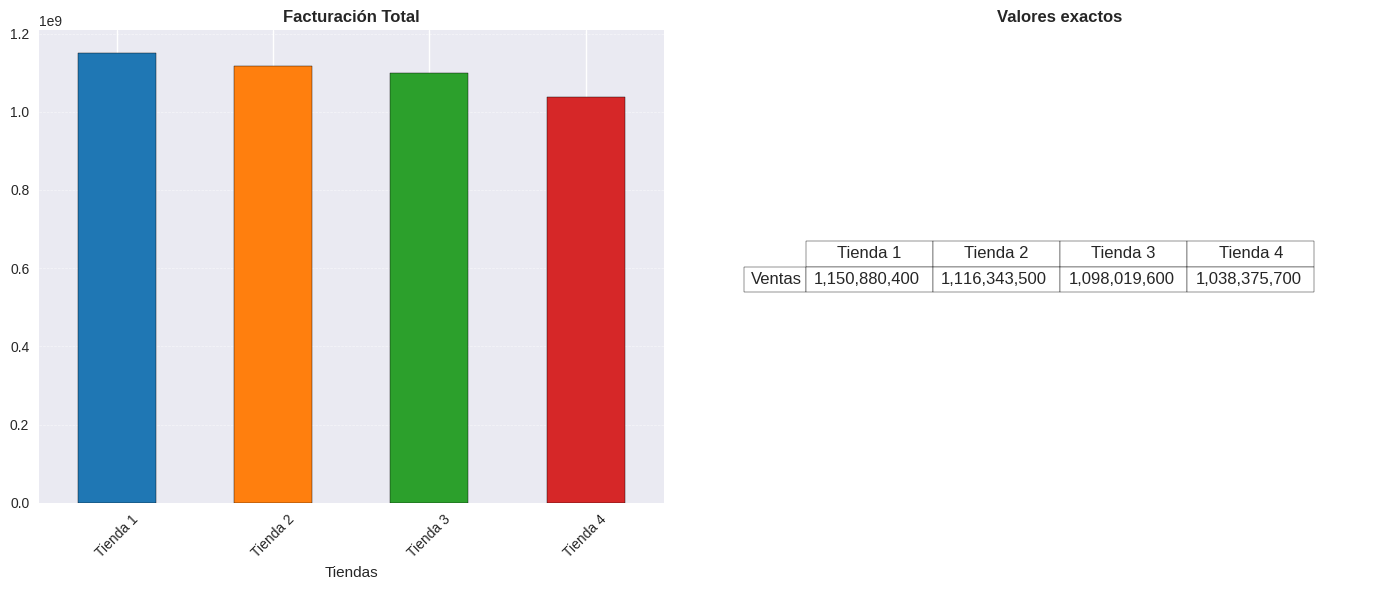

In [150]:
#decidi tomar esta via ya que con estas 2 graficas la de tabla y la de graficos
#se muestran los datos mas claramente, ademas los numeros muy grandes no se ven
#muy bien en la izquierda de la grafica

df_tiendas = pd.DataFrame({
    'Tiendas': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ventas': [ingreso_total_tienda1, ingreso_total_tienda2, ingreso_total_tienda3, ingreso_total_tienda4]
})

plt.style.use('seaborn-v0_8')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#grafico de barras
df_tiendas.plot(x='Tiendas', y='Ventas', kind='bar', legend=False, ax=ax1, color=colors, edgecolor='black')
ax1.set_title('Facturación Total', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.6, linestyle='--', linewidth=0.5)
ax1.edgecolor = 'black'



#aplicamos que la tabla tenga valores exactos
table_data = [[f'{x:,.0f}' for x in df_tiendas['Ventas']]]
ax2.axis('off')
table = ax2.table(cellText=table_data,
                  rowLabels=['Ventas'],
                  colLabels=df_tiendas['Tiendas'],
                  loc='center')
table.auto_set_font_size(False)
table.auto_set_column_width(range(len(df_tiendas['Tiendas']) + 1))
table.scale(1.2, 1.5)
table.set_fontsize(12)
ax2.set_title('Valores exactos', fontweight='bold')

plt.tight_layout()
plt.show()


##Gráfico para mostrar comparativa de las ventas de cada Categoria por tienda.

<Figure size 1400x800 with 0 Axes>

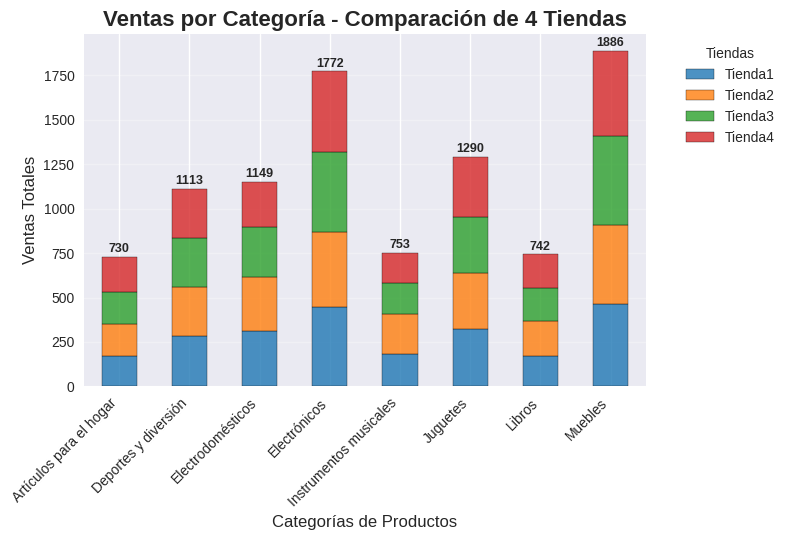

In [151]:
# aqui usamos los Series generados en el punto 2 mas arriba para generar el dataFrame para el grafico de barras apiladas
df_apilado = pd.DataFrame({
    'Tienda1': conteo_ventas_categorias,
    'Tienda2': conteo_ventas_categorias_tienda2,
    'Tienda3': conteo_ventas_categorias_tienda3,
    'Tienda4': conteo_ventas_categorias_tienda4
})


plt.figure(figsize=(14, 8))
ax = df_apilado.plot(kind='bar', stacked=True,
                    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
                    alpha=0.8, edgecolor='black')

plt.title('Ventas por Categoría - Comparación de 4 Tiendas', fontsize=16, fontweight='bold')
plt.xlabel('Categorías de Productos', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# con esto le ponemos valores a cada barra para dejar mas completa la informacion
for i, total in enumerate(df_apilado.sum(axis=1)):
    ax.text(i, total + 10, f'{int(total)}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

##Gráfico para mostrar Calificación Promedio vs Facturación


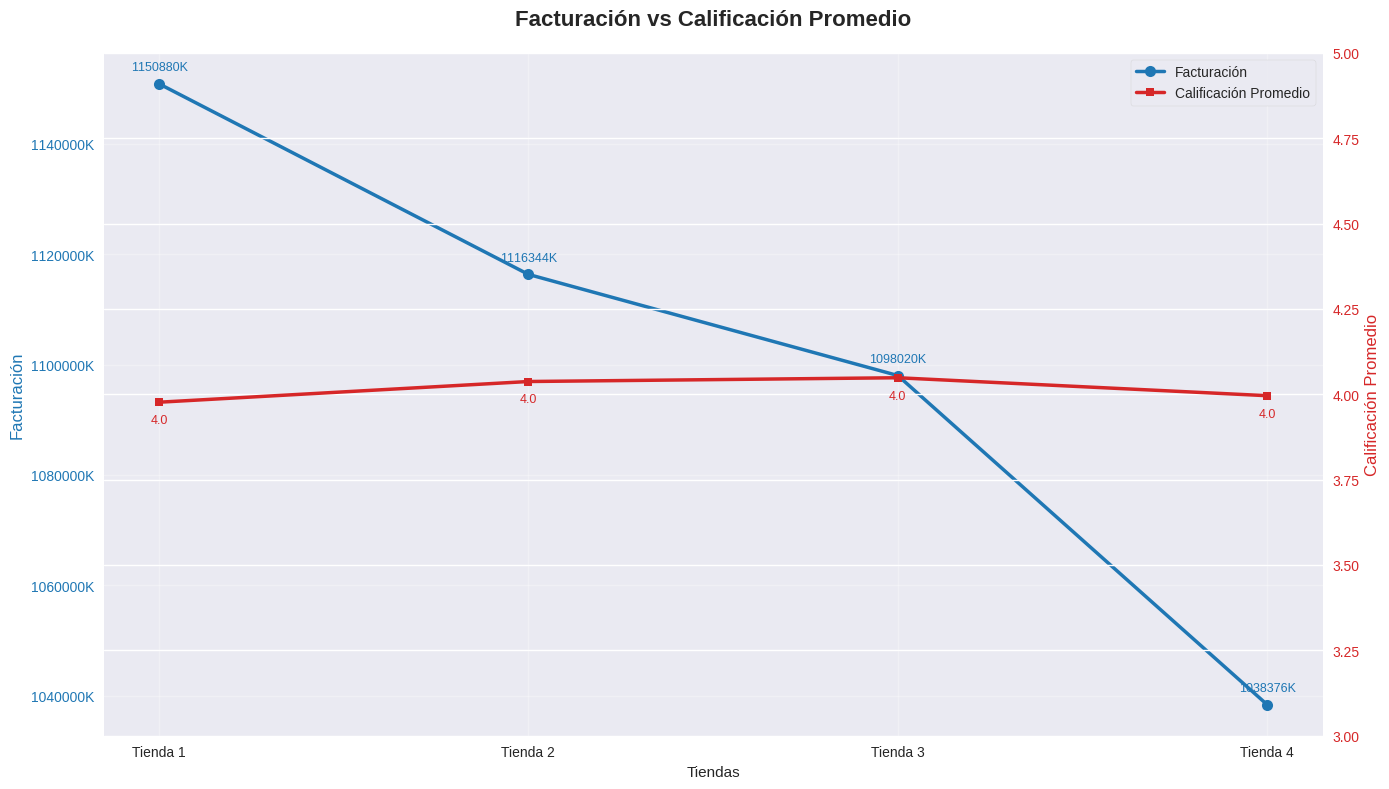

In [152]:
#traemos los datos para generar con ellos luego un dataFrame
Tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [ingreso_total_tienda1, ingreso_total_tienda2, ingreso_total_tienda3, ingreso_total_tienda4]
calificacion_promedio = [calificacion_media_tienda1, calificacion_media_tienda2, calificacion_media_tienda3, calificacion_media_tienda4]

#Creamos el dataFrame
df_tendencias = pd.DataFrame({
    'Tienda': Tiendas,
    'Facturacion': facturacion,
    'Calificacion_Promedio': calificacion_promedio
})

#crear el grafico de líneas con dos ejes Y
fig, ax1 = plt.subplots(figsize=(14, 8))

#eje Facturacion
color_facturacion = 'tab:blue'
ax1.set_xlabel('Tiendas')
ax1.set_ylabel('Facturación', color=color_facturacion, fontsize=12)
line1 = ax1.plot(df_tendencias['Tienda'], df_tendencias['Facturacion'],
                color=color_facturacion, marker='o', linewidth=2.5,
                markersize=8, label='Facturación')
ax1.tick_params(axis='y', labelcolor=color_facturacion)
ax1.grid(True, alpha=0.3)

#damos formato a los montos de facturacion en miles o millones
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

#eje calificacion
ax2 = ax1.twinx()
color_calificacion = 'tab:red'
ax2.set_ylabel('Calificación Promedio', color=color_calificacion, fontsize=12)
line2 = ax2.plot(df_tendencias['Tienda'], df_tendencias['Calificacion_Promedio'],
                color=color_calificacion, marker='s', linewidth=2.5,
                markersize=6, label='Calificación Promedio')
ax2.tick_params(axis='y', labelcolor=color_calificacion)
ax2.set_ylim(3, 5)

# mostramos los valores en los puntos para que se vea mas completa la informacion
for i, (fact, calif) in enumerate(zip(df_tendencias['Facturacion'], df_tendencias['Calificacion_Promedio'])):
    ax1.annotate(f'{fact/1000:.0f}K', (i, fact), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9, color=color_facturacion)
    ax2.annotate(f'{calif:.1f}', (i, calif), textcoords="offset points",
                xytext=(0,-15), ha='center', fontsize=9, color=color_calificacion)


plt.title('Facturación vs Calificación Promedio',
          fontsize=16, fontweight='bold', pad=20)

# combinamos las 2 leyendas de ambos ejes para que se visualice bien.
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', frameon=True)

plt.tight_layout()
plt.show()

##Gráfico para mostrar coste promedio de envío vs facturación

Datos para gráfico de dispersión:
     Tienda   Facturacion   Coste_Envio      Tamanio
0  Tienda 1  1.150880e+09  26018.609580  2601.860958
1  Tienda 2  1.116344e+09  25216.235693  2521.623569
2  Tienda 3  1.098020e+09  24805.680373  2480.568037
3  Tienda 4  1.038376e+09  23459.457167  2345.945717




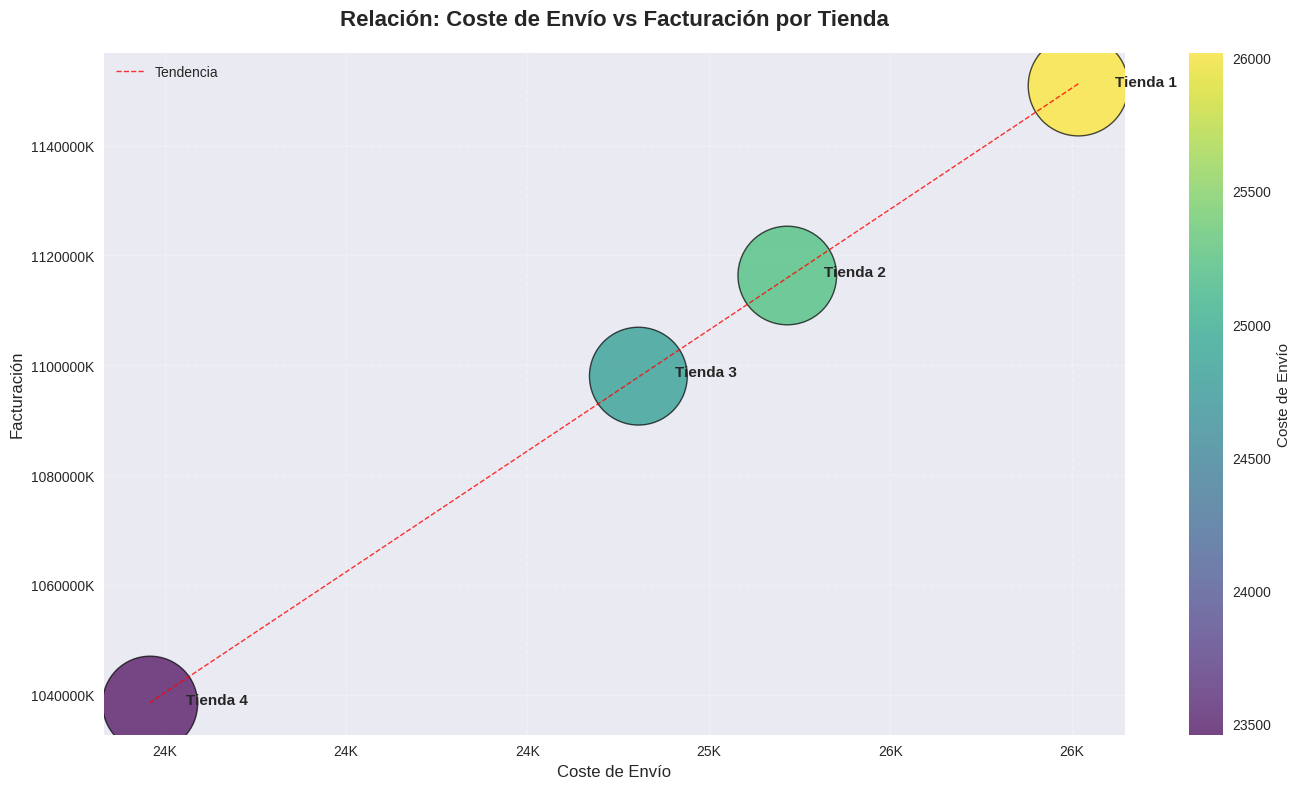

In [153]:
import numpy as np

#traemos los valores para luego generar el dataFrame
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [ingreso_total_tienda1, ingreso_total_tienda2, ingreso_total_tienda3, ingreso_total_tienda4]
coste_envio = [media_costes_envio_tienda1, media_costes_envio_tienda2, media_costes_envio_tienda3, media_costes_envio_tienda4]
tamanio_puntos = [(media_costes_envio_tienda1 / 10),
                  (media_costes_envio_tienda2 / 10),
                   (media_costes_envio_tienda3 / 10),
                    (media_costes_envio_tienda4 / 10)] # esto hay que hacerlo si o si, porque si no los puntos se veran astronomicamente grandes :D.

#creamos nuevo dataFrame
df_dispersion = pd.DataFrame({
    'Tienda': tiendas,
    'Facturacion': facturacion,
    'Coste_Envio': coste_envio,
    'Tamanio': tamanio_puntos
})

print("Datos para gráfico de dispersión:")
print(df_dispersion)
print("\n" + "="*50 + "\n")

#creamos el gráfico de dispersion
plt.figure(figsize=(14, 8))

# Crear scatter plot con puntos de diferente tamaño y color
scatter = plt.scatter(
    x=df_dispersion['Coste_Envio'],
    y=df_dispersion['Facturacion'],
    s=df_dispersion['Tamanio'] * 2,
    c=df_dispersion['Coste_Envio'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='black',
    linewidth=1
)

# Añadir etiquetas de tiendas
for i, tienda in enumerate(df_dispersion['Tienda']):
    plt.annotate(tienda,
                (df_dispersion['Coste_Envio'][i] + 100, df_dispersion['Facturacion'][i] + 1000),
                fontsize=11, fontweight='bold', ha='left')

# Personalización del gráfico
plt.title('Relación: Coste de Envío vs Facturación por Tienda',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Coste de Envío', fontsize=12)
plt.ylabel('Facturación', fontsize=12)

# Formatear ejes
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

plt.grid(True, alpha=0.3, linestyle='--')
cbar = plt.colorbar(scatter)
cbar.set_label('Coste de Envío', fontsize=11)

#añadimos la linea de tendencia
z = np.polyfit(df_dispersion['Coste_Envio'], df_dispersion['Facturacion'], 1)
p = np.poly1d(z)
plt.plot(df_dispersion['Coste_Envio'], p(df_dispersion['Coste_Envio']),
         "r--", alpha=0.8, linewidth=1, label='Tendencia')

plt.legend()
plt.tight_layout()
plt.show()

#Desafio Extra

##Tienda 1

In [154]:
#analisis de datos geográficos
print("Analisis geografico de la tienda 1")
print('----------------------------------------')
print(f"Total de ventas con coordenadas: {len(tienda1)}")
print(f"Rango de latitud: {tienda1['lat'].min():.4f} a {tienda1['lat'].max():.4f}")
print(f"Rango de longitud: {tienda1['lon'].min():.4f} a {tienda1['lon'].max():.4f}")
print(f"Centro geográfico: Lat {tienda1['lat'].mean():.4f}, Lon {tienda1['lon'].mean():.4f}")

print(f"\nRango de coordenadas para Colombia")
print(f"Latitud esperada: ~-4 a ~12 | Longitud esperada: ~-79 a ~-66")

Analisis geografico de la tienda 1
----------------------------------------
Total de ventas con coordenadas: 2359
Rango de latitud: -4.2153 a 11.5444
Rango de longitud: -77.2811 a -67.9239
Centro geográfico: Lat 5.3653, Lon -74.7894

Rango de coordenadas para Colombia
Latitud esperada: ~-4 a ~12 | Longitud esperada: ~-79 a ~-66


Ubicaciones únicas con ventas: 19
Ventas totales: 2359
Promedio de ventas por ubicación: 124.2




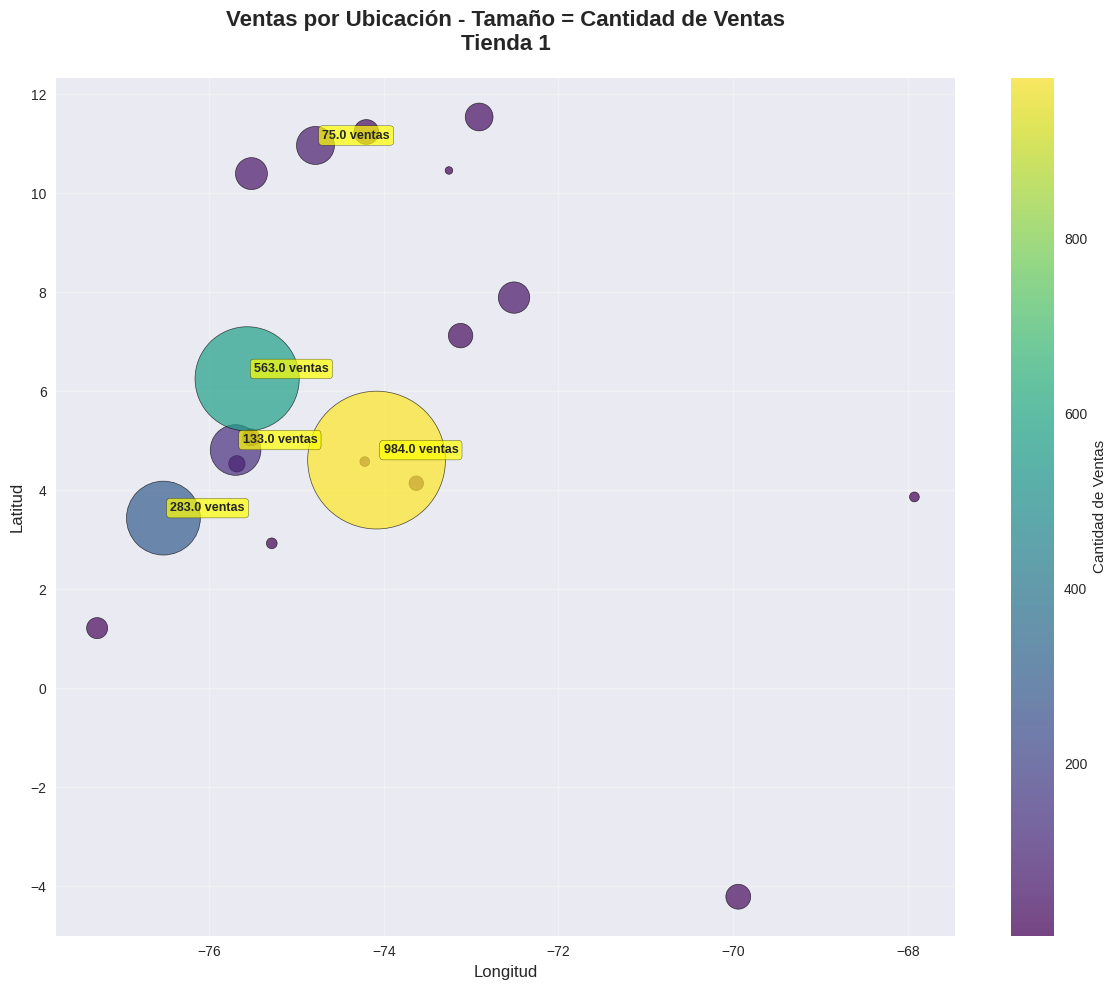

In [155]:
#vamos a generar un grafico de dispersion para mostrar la distribucion de las ventas
ventas_por_ubicacion_tienda1 = tienda1.groupby(['lat', 'lon']).size().reset_index(name='cantidad_ventas')

print(f"Ubicaciones únicas con ventas: {len(ventas_por_ubicacion_tienda1)}")
print(f"Ventas totales: {ventas_por_ubicacion_tienda1['cantidad_ventas'].sum()}")
print(f"Promedio de ventas por ubicación: {ventas_por_ubicacion_tienda1['cantidad_ventas'].mean():.1f}")
print('\n')

plt.figure(figsize=(12, 10))

#scatter plot con tamaño proporcional a cantidad de ventas
plt.scatter(
    x=ventas_por_ubicacion_tienda1['lon'],
    y=ventas_por_ubicacion_tienda1['lat'],
    s=ventas_por_ubicacion_tienda1['cantidad_ventas'] * 10,
    alpha=0.7,
    c=ventas_por_ubicacion_tienda1['cantidad_ventas'],
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)

plt.colorbar(label='Cantidad de Ventas')
plt.title('Ventas por Ubicación - Tamaño = Cantidad de Ventas\nTienda 1',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.grid(True, alpha=0.3)

#anotaciones para los puntos mas importantes
top_ubicaciones = ventas_por_ubicacion_tienda1.nlargest(5, 'cantidad_ventas')
for i, row in top_ubicaciones.iterrows():
    plt.annotate(f"{row['cantidad_ventas']} ventas",
                (row['lon'], row['lat']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

In [156]:
#distribucion de ventas por ubicacion
print("Distirbucion de ventas por ubicacion")
print(ventas_por_ubicacion_tienda1['cantidad_ventas'].describe())

#top ubicaciones
print("\n Top 5 ubicaciones con mas ventas")
print(ventas_por_ubicacion_tienda1.nlargest(5, 'cantidad_ventas'))

Distirbucion de ventas por ubicacion
count     19.000000
mean     124.157895
std      247.983481
min        3.000000
25%       12.500000
50%       32.000000
75%       64.000000
max      984.000000
Name: cantidad_ventas, dtype: float64

 Top 5 ubicaciones con mas ventas
         lat       lon  cantidad_ventas
8    4.60971 -74.08175              984
11   6.25184 -75.56359              563
3    3.43722 -76.52250              283
9    4.81333 -75.69611              133
16  10.96854 -74.78132               75


### Analisis de los resultados para la tienda 1:



In [157]:
"""
Cuales son las 3 ubicaciones con más ventas?
    lat       lon  cantidad_ventas
8    4.60971 -74.08175              984
11   6.25184 -75.56359              563
3    3.43722 -76.52250              283

-------------------------------------------------------------
porcentaje de ventas que viene del top 5 ubicaciones:
984 representa el 41,71% de las ventas
563 representa el 23,86% de las ventas
283 representa el 11,99% de las ventas
133 representa el  5,63% de las ventas
75  representa el  3,17% de las ventas

"""

' \nCuales son las 3 ubicaciones con más ventas?\n    lat       lon  cantidad_ventas\n8    4.60971 -74.08175              984\n11   6.25184 -75.56359              563\n3    3.43722 -76.52250              283\n\n-------------------------------------------------------------\nporcentaje de ventas que viene del top 5 ubicaciones:\n984 representa el 41,71% de las ventas\n563 representa el 23,86% de las ventas\n283 representa el 11,99% de las ventas\n133 representa el  5,63% de las ventas\n75  representa el  3,17% de las ventas\n\n'

## Tienda 2

In [158]:
#analisis de datos geográficos
print("Analisis geografico de la tienda 2")
print('----------------------------------------')
print(f"Total de ventas con coordenadas: {len(tienda2)}")
print(f"Rango de latitud: {tienda2['lat'].min():.4f} a {tienda2['lat'].max():.4f}")
print(f"Rango de longitud: {tienda2['lon'].min():.4f} a {tienda2['lon'].max():.4f}")
print(f"Centro geográfico: Lat {tienda2['lat'].mean():.4f}, Lon {tienda2['lon'].mean():.4f}")

print(f"\nRango de coordenadas para Colombia")
print(f"Latitud esperada: ~-4 a ~12 | Longitud esperada: ~-79 a ~-66")

Analisis geografico de la tienda 2
----------------------------------------
Total de ventas con coordenadas: 2359
Rango de latitud: -4.2153 a 11.5444
Rango de longitud: -77.2811 a -67.9239
Centro geográfico: Lat 5.4998, Lon -74.7430

Rango de coordenadas para Colombia
Latitud esperada: ~-4 a ~12 | Longitud esperada: ~-79 a ~-66


Ubicaciones únicas con ventas: 19
Ventas totales: 2359
Promedio de ventas por ubicación: 124.2




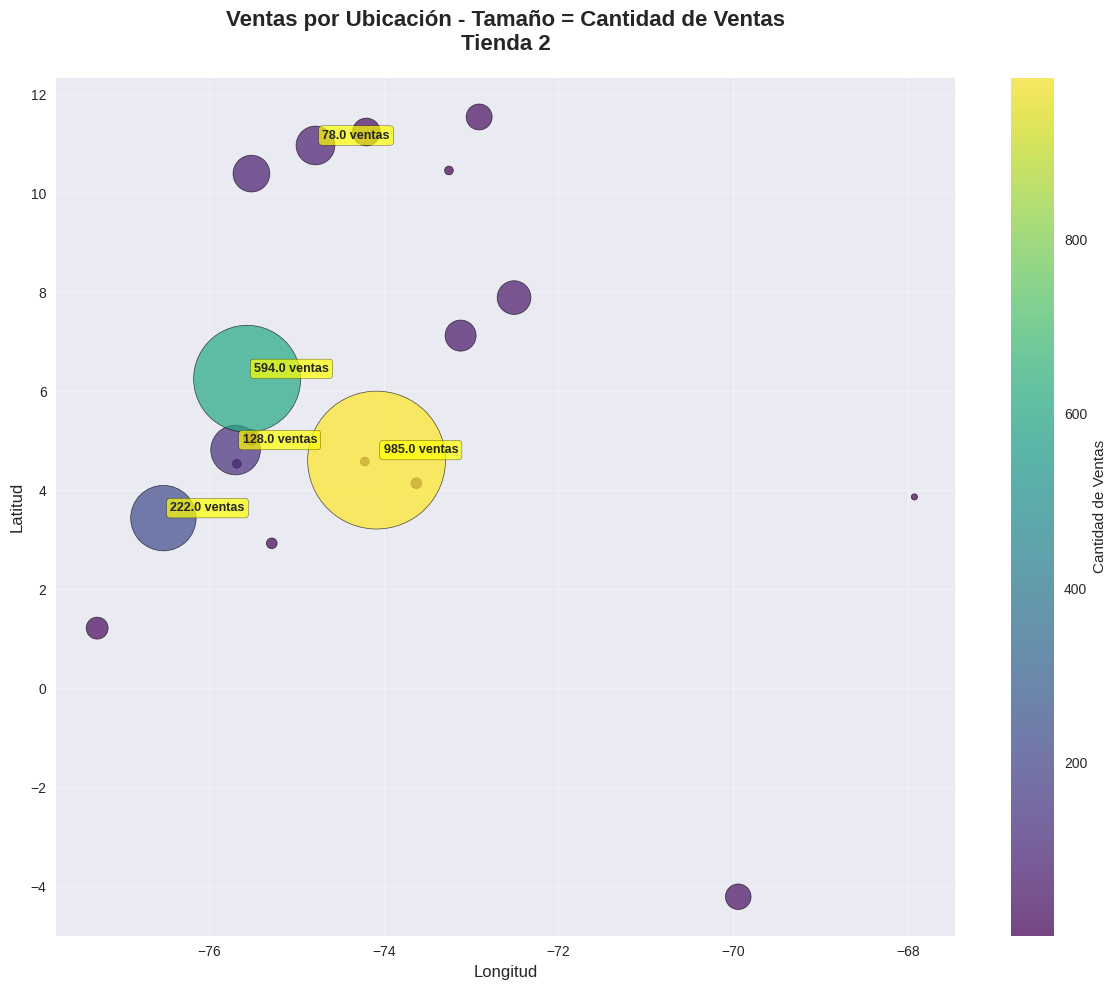

In [159]:
#vamos a generar un grafico de dispersion para mostrar la distribucion de las ventas
ventas_por_ubicacion_tienda2 = tienda2.groupby(['lat', 'lon']).size().reset_index(name='cantidad_ventas')

print(f"Ubicaciones únicas con ventas: {len(ventas_por_ubicacion_tienda2)}")
print(f"Ventas totales: {ventas_por_ubicacion_tienda2['cantidad_ventas'].sum()}")
print(f"Promedio de ventas por ubicación: {ventas_por_ubicacion_tienda2['cantidad_ventas'].mean():.1f}")
print('\n')

plt.figure(figsize=(12, 10))

#scatter plot con tamaño proporcional a cantidad de ventas
plt.scatter(
    x=ventas_por_ubicacion_tienda2['lon'],
    y=ventas_por_ubicacion_tienda2['lat'],
    s=ventas_por_ubicacion_tienda2['cantidad_ventas'] * 10,
    alpha=0.7,
    c=ventas_por_ubicacion_tienda2['cantidad_ventas'],
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)

plt.colorbar(label='Cantidad de Ventas')
plt.title('Ventas por Ubicación - Tamaño = Cantidad de Ventas\nTienda 2',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.grid(True, alpha=0.3)

#anotaciones para los puntos mas importantes
top_ubicaciones = ventas_por_ubicacion_tienda2.nlargest(5, 'cantidad_ventas')
for i, row in top_ubicaciones.iterrows():
    plt.annotate(f"{row['cantidad_ventas']} ventas",
                (row['lon'], row['lat']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

In [160]:
#distribucion de ventas por ubicacion
print("Distirbucion de ventas por ubicacion")
print(ventas_por_ubicacion_tienda2['cantidad_ventas'].describe())

#top ubicaciones
print("\n Top 5 ubicaciones con mas ventas")
print(ventas_por_ubicacion_tienda2.nlargest(5, 'cantidad_ventas'))

Distirbucion de ventas por ubicacion
count     19.000000
mean     124.157895
std      249.188073
min        2.000000
25%        6.000000
50%       35.000000
75%       74.000000
max      985.000000
Name: cantidad_ventas, dtype: float64

 Top 5 ubicaciones con mas ventas
         lat       lon  cantidad_ventas
8    4.60971 -74.08175              985
11   6.25184 -75.56359              594
3    3.43722 -76.52250              222
9    4.81333 -75.69611              128
16  10.96854 -74.78132               78


### Analisis de los resultados para la tienda 2:

In [161]:
"""
Cuales son las 3 ubicaciones con más ventas?
         lat       lon  cantidad_ventas
8    4.60971 -74.08175              985
11   6.25184 -75.56359              594
3    3.43722 -76.52250              222

-------------------------------------------------------------
porcentaje de ventas que viene del top 5 ubicaciones:
985 representa el 41,75% de las ventas
594 representa el 25,18% de las ventas
222 representa el  9,41% de las ventas
128 representa el  5,42% de las ventas
78  representa el  3,30% de las ventas

"""

' \nCuales son las 3 ubicaciones con más ventas?\n         lat       lon  cantidad_ventas\n8    4.60971 -74.08175              985\n11   6.25184 -75.56359              594\n3    3.43722 -76.52250              222\n\n-------------------------------------------------------------\nporcentaje de ventas que viene del top 5 ubicaciones:\n985 representa el 41,75% de las ventas\n594 representa el 25,18% de las ventas\n222 representa el  9,41% de las ventas\n128 representa el  5,42% de las ventas\n78  representa el  3,30% de las ventas\n\n'

## Tienda 3

In [162]:
#analisis de datos geográficos
print("Analisis geografico de la tienda 3")
print('----------------------------------------')
print(f"Total de ventas con coordenadas: {len(tienda3)}")
print(f"Rango de latitud: {tienda3['lat'].min():.4f} a {tienda3['lat'].max():.4f}")
print(f"Rango de longitud: {tienda3['lon'].min():.4f} a {tienda3['lon'].max():.4f}")
print(f"Centro geográfico: Lat {tienda3['lat'].mean():.4f}, Lon {tienda3['lon'].mean():.4f}")

print(f"\nRango de coordenadas para Colombia")
print(f"Latitud esperada: ~-4 a ~12 | Longitud esperada: ~-79 a ~-66")

Analisis geografico de la tienda 3
----------------------------------------
Total de ventas con coordenadas: 2359
Rango de latitud: -4.2153 a 11.5444
Rango de longitud: -77.2811 a -67.9239
Centro geográfico: Lat 5.4371, Lon -74.7335

Rango de coordenadas para Colombia
Latitud esperada: ~-4 a ~12 | Longitud esperada: ~-79 a ~-66


Ubicaciones únicas con ventas: 19
Ventas totales: 2359
Promedio de ventas por ubicación: 124.2




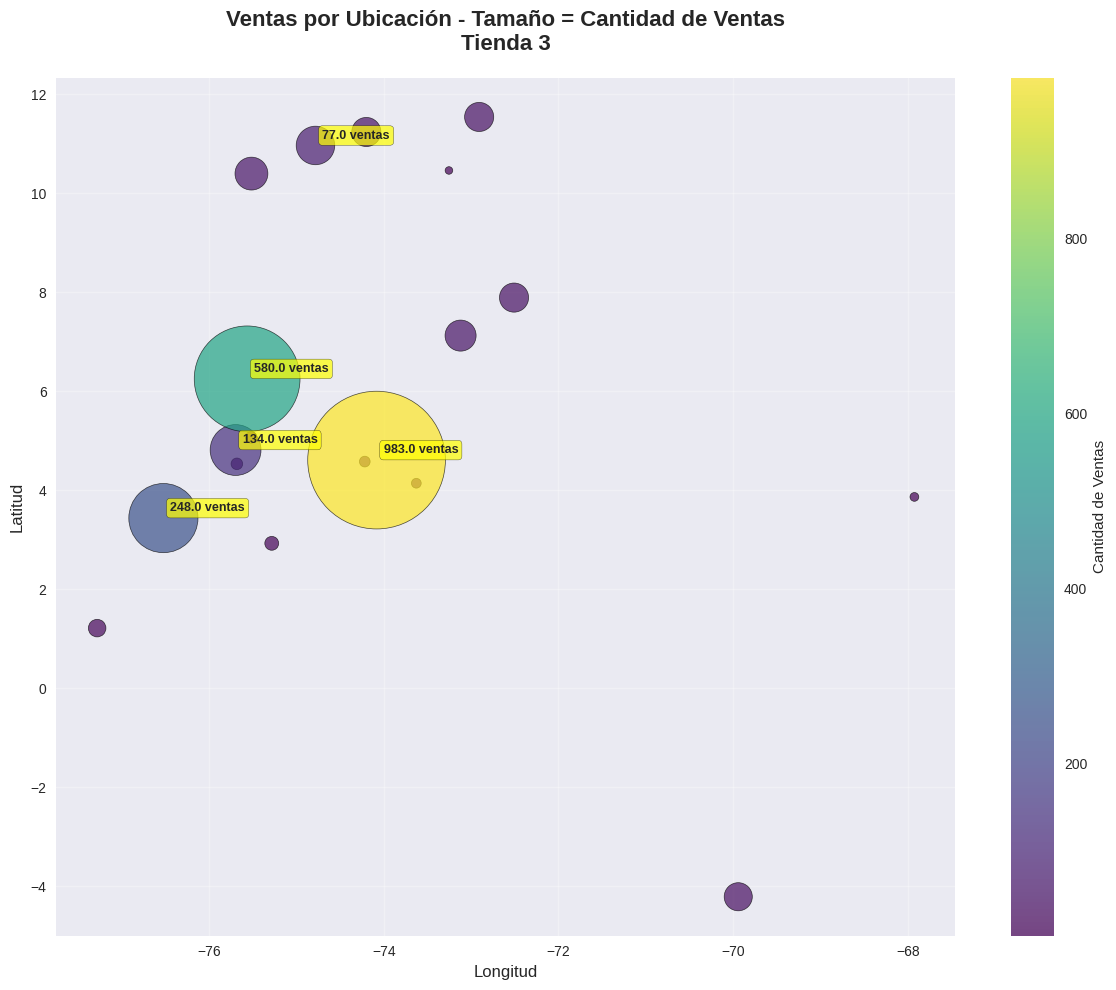

In [163]:
#vamos a generar un grafico de dispersion para mostrar la distribucion de las ventas
ventas_por_ubicacion_tienda3 = tienda3.groupby(['lat', 'lon']).size().reset_index(name='cantidad_ventas')

print(f"Ubicaciones únicas con ventas: {len(ventas_por_ubicacion_tienda3)}")
print(f"Ventas totales: {ventas_por_ubicacion_tienda3['cantidad_ventas'].sum()}")
print(f"Promedio de ventas por ubicación: {ventas_por_ubicacion_tienda3['cantidad_ventas'].mean():.1f}")
print('\n')

plt.figure(figsize=(12, 10))

#scatter plot con tamaño proporcional a cantidad de ventas
plt.scatter(
    x=ventas_por_ubicacion_tienda3['lon'],
    y=ventas_por_ubicacion_tienda3['lat'],
    s=ventas_por_ubicacion_tienda3['cantidad_ventas'] * 10,
    alpha=0.7,
    c=ventas_por_ubicacion_tienda3['cantidad_ventas'],
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)

plt.colorbar(label='Cantidad de Ventas')
plt.title('Ventas por Ubicación - Tamaño = Cantidad de Ventas\nTienda 3',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.grid(True, alpha=0.3)

#anotaciones para los puntos mas importantes
top_ubicaciones = ventas_por_ubicacion_tienda3.nlargest(5, 'cantidad_ventas')
for i, row in top_ubicaciones.iterrows():
    plt.annotate(f"{row['cantidad_ventas']} ventas",
                (row['lon'], row['lat']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

In [164]:
#distribucion de ventas por ubicacion
print("Distirbucion de ventas por ubicacion")
print(ventas_por_ubicacion_tienda3['cantidad_ventas'].describe())

#top ubicaciones
print("\n Top 5 ubicaciones con mas ventas")
print(ventas_por_ubicacion_tienda3.nlargest(5, 'cantidad_ventas'))

Distirbucion de ventas por ubicacion
count     19.000000
mean     124.157895
std      248.199575
min        3.000000
25%        7.000000
50%       44.000000
75%       66.500000
max      983.000000
Name: cantidad_ventas, dtype: float64

 Top 5 ubicaciones con mas ventas
         lat       lon  cantidad_ventas
8    4.60971 -74.08175              983
11   6.25184 -75.56359              580
3    3.43722 -76.52250              248
9    4.81333 -75.69611              134
16  10.96854 -74.78132               77


### Analisis de los resultados para la tienda 3:

In [165]:
"""
Cuales son las 3 ubicaciones con más ventas?
         lat       lon  cantidad_ventas
8    4.60971 -74.08175              983
11   6.25184 -75.56359              580
3    3.43722 -76.52250              248

-------------------------------------------------------------
porcentaje de ventas que viene del top 5 ubicaciones:
983 representa el 41,67% de las ventas
580 representa el 24,58% de las ventas
248 representa el 10,51% de las ventas
134 representa el  5,68% de las ventas
77  representa el  3,26% de las ventas

"""

' \nCuales son las 3 ubicaciones con más ventas?\n         lat       lon  cantidad_ventas\n8    4.60971 -74.08175              983\n11   6.25184 -75.56359              580\n3    3.43722 -76.52250              248\n\n-------------------------------------------------------------\nporcentaje de ventas que viene del top 5 ubicaciones:\n983 representa el 41,67% de las ventas\n580 representa el 24,58% de las ventas\n248 representa el 10,51% de las ventas\n134 representa el  5,68% de las ventas\n77  representa el  3,26% de las ventas\n\n'

## Tienda 4

In [166]:
#analisis de datos geográficos
print("Analisis geografico de la tienda 4")
print('----------------------------------------')
print(f"Total de ventas con coordenadas: {len(tienda4)}")
print(f"Rango de latitud: {tienda4['lat'].min():.4f} a {tienda4['lat'].max():.4f}")
print(f"Rango de longitud: {tienda4['lon'].min():.4f} a {tienda4['lon'].max():.4f}")
print(f"Centro geográfico: Lat {tienda4['lat'].mean():.4f}, Lon {tienda4['lon'].mean():.4f}")

print(f"\nRango de coordenadas para Colombia")
print(f"Latitud esperada: ~-4 a ~12 | Longitud esperada: ~-79 a ~-66")

Analisis geografico de la tienda 4
----------------------------------------
Total de ventas con coordenadas: 2358
Rango de latitud: -4.2153 a 11.5444
Rango de longitud: -77.2811 a -67.9239
Centro geográfico: Lat 5.4135, Lon -74.7746

Rango de coordenadas para Colombia
Latitud esperada: ~-4 a ~12 | Longitud esperada: ~-79 a ~-66


Ubicaciones únicas con ventas: 19
Ventas totales: 2358
Promedio de ventas por ubicación: 124.1




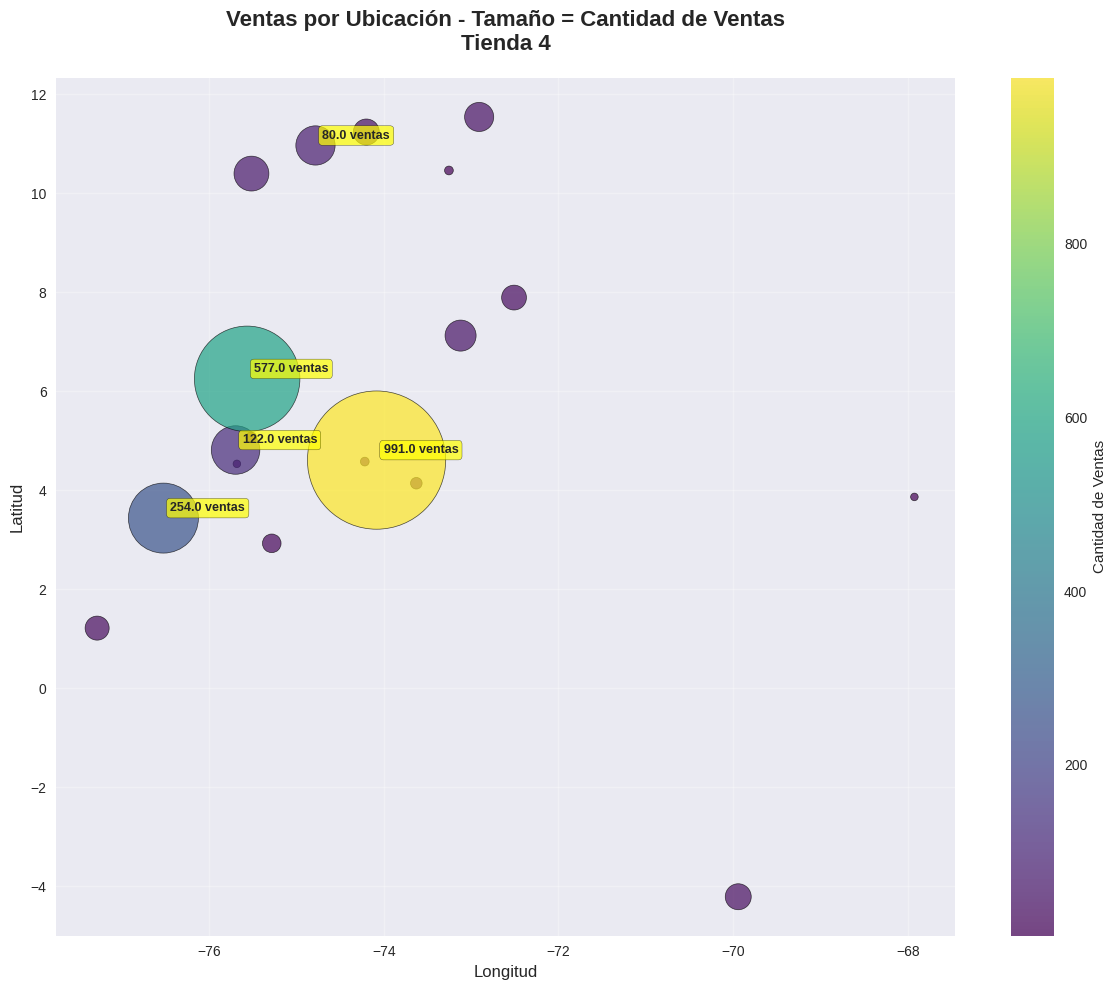

In [167]:
#vamos a generar un grafico de dispersion para mostrar la distribucion de las ventas
ventas_por_ubicacion_tienda4 = tienda4.groupby(['lat', 'lon']).size().reset_index(name='cantidad_ventas')

print(f"Ubicaciones únicas con ventas: {len(ventas_por_ubicacion_tienda4)}")
print(f"Ventas totales: {ventas_por_ubicacion_tienda4['cantidad_ventas'].sum()}")
print(f"Promedio de ventas por ubicación: {ventas_por_ubicacion_tienda4['cantidad_ventas'].mean():.1f}")
print('\n')

plt.figure(figsize=(12, 10))

#scatter plot con tamaño proporcional a cantidad de ventas
plt.scatter(
    x=ventas_por_ubicacion_tienda4['lon'],
    y=ventas_por_ubicacion_tienda4['lat'],
    s=ventas_por_ubicacion_tienda4['cantidad_ventas'] * 10,
    alpha=0.7,
    c=ventas_por_ubicacion_tienda4['cantidad_ventas'],
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)

plt.colorbar(label='Cantidad de Ventas')
plt.title('Ventas por Ubicación - Tamaño = Cantidad de Ventas\nTienda 4',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.grid(True, alpha=0.3)

#anotaciones para los puntos mas importantes
top_ubicaciones = ventas_por_ubicacion_tienda4.nlargest(5, 'cantidad_ventas')
for i, row in top_ubicaciones.iterrows():
    plt.annotate(f"{row['cantidad_ventas']} ventas",
                (row['lon'], row['lat']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

In [168]:
#distribucion de ventas por ubicacion
print("Distirbucion de ventas por ubicacion")
print(ventas_por_ubicacion_tienda4['cantidad_ventas'].describe())

#top ubicaciones
print("\n Top 5 ubicaciones con mas ventas")
print(ventas_por_ubicacion_tienda4.nlargest(5, 'cantidad_ventas'))

Distirbucion de ventas por ubicacion
count     19.000000
mean     124.105263
std      249.600546
min        3.000000
25%        6.500000
50%       35.000000
75%       71.500000
max      991.000000
Name: cantidad_ventas, dtype: float64

 Top 5 ubicaciones con mas ventas
         lat       lon  cantidad_ventas
8    4.60971 -74.08175              991
11   6.25184 -75.56359              577
3    3.43722 -76.52250              254
9    4.81333 -75.69611              122
16  10.96854 -74.78132               80


### Analisis de los resultados para la tienda 4:

In [169]:
"""
Cuales son las 3 ubicaciones con más ventas?
         lat       lon  cantidad_ventas
8    4.60971 -74.08175              991
11   6.25184 -75.56359              577
3    3.43722 -76.52250              254

-------------------------------------------------------------
porcentaje de ventas que viene del top 5 ubicaciones:
991 representa el 42,02% de las ventas
577 representa el 24,46% de las ventas
254 representa el 10,77% de las ventas
122 representa el  5,17% de las ventas
80  representa el  3,39% de las ventas

"""

' \nCuales son las 3 ubicaciones con más ventas?\n         lat       lon  cantidad_ventas\n8    4.60971 -74.08175              991\n11   6.25184 -75.56359              577\n3    3.43722 -76.52250              254\n\n-------------------------------------------------------------\nporcentaje de ventas que viene del top 5 ubicaciones:\n991 representa el 42,02% de las ventas\n577 representa el 24,46% de las ventas\n254 representa el 10,77% de las ventas\n122 representa el  5,17% de las ventas\n80  representa el  3,39% de las ventas\n\n'

#Informe final sobre el analisis de los datos.

## Conclusion


La tienda que debe ser vendida es la tienda 4

Tal como se va a demostrar a continuación y en base a lo estimado en algunas Gráficas y datos anteriores,l a decision de vender la tienda 4 se puede resumir en los siguientes puntos:

* La tienda 4 ha facturado casi 60 millones menos que la otra tienda que menos facturo, lo que es significativamente menor comparado con la diferencia entre la segunda y tercera tienda que mas facturaron donde la diferencia es de 18 millones aproximadamente.

* La tienda 4 en promedio tiene un precio por producto significativamente mas bajo que el precio promedio de las otras tiendas.

* Según los gráficos de dispersion la tienda 4 vende en las mismas zonas que las otras 3 tiendas, lo que signifca que vender la tienda 4 no afectara en nada a esas zonas ya que las otras 3 tiendas venden en las mismas zonas y pueden cubrir la demanda sin problemas.

* No se ve una correlación entre la valoracion de la tienda y la facturación, en promedio las 4 tiendas tienen una valoracion estable y ninguna destaca significativamente sobre las otras.

* En porcentaje de prodcutos vendido la tienda 4 representa un 25% aprox, sin embargo en lo que respecta a la facturación la tienda cuantro solo representa el 23 % aproximadamente.

* En lo unico que destacaba la tienda 4 era en el precio de envio que si parecia ser menor en comparacion a las otras tiendas pero aun con este bajo coste de envio no lo compensa, se podria usar como estrategia de captacion para las otras tiendas aplicar un descuento de 10$ en la primera compra que hagan los clientes si eran clientes de la tienda 4, esto seria solo la primera vez y los clientes lo verian con buen ojo.

* Como curiosidad general en todas las tiendas la categoria mas vendida es la de muebles, sin embargo la categoria que genera mas ingresos es la de electrodomesticos, incluyendo a la tienda 4 donde a pesar de que es la categoria mas popular no alcanza el valor de facturacion de otras tiendas.

In [170]:
#metricas importates de precios por tienda para la toma de la decision
def analizar_precios(tienda, nombre):
    return {
        'Tienda': nombre,
        'Total_Ventas': len(tienda),
        'Facturacion_Total': tienda['Precio'].sum(),
        'Precio_Promedio': tienda['Precio'].mean(),
        'Precio_Mediano': tienda['Precio'].median(),
        'Precio_Maximo': tienda['Precio'].max(),
        'Precio_Minimo': tienda['Precio'].min(),
        'Desviacion_Estandar': tienda['Precio'].std(),
        'Top_10%_Precios': tienda['Precio'].quantile(0.9)
    }

#analisis a todas las tiendas
analisis_tiendas = []
for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    analisis_tiendas.append(analizar_precios(tienda, f'Tienda {i}'))

#dataFrame comparativo
df_comparativo = pd.DataFrame(analisis_tiendas)
print("Analisis comparativo de precios")
print(df_comparativo.to_string(index=False, float_format='%.2f'))
print("\n" + "="*60)

Analisis comparativo de precios
  Tienda  Total_Ventas  Facturacion_Total  Precio_Promedio  Precio_Mediano  Precio_Maximo  Precio_Minimo  Desviacion_Estandar  Top_10%_Precios
Tienda 1          2359      1150880400.00        487867.91       235300.00     2977000.00        7600.00            614686.77       1420260.00
Tienda 2          2359      1116343500.00        473227.43       218200.00     2953400.00        7600.00            595559.55       1381140.00
Tienda 3          2359      1098019600.00        465459.77       226300.00     2968200.00        7600.00            580643.39       1344000.00
Tienda 4          2358      1038375700.00        440362.89       209450.00     2902200.00        7600.00            568755.60       1329780.00



In [171]:
#diferencias porcentuales
facturacion_total = df_comparativo['Facturacion_Total'].sum()
precio_promedio_t4 = df_comparativo.loc[3, 'Precio_Promedio']
precio_promedio_otras = df_comparativo.loc[:2, 'Precio_Promedio'].mean()

print("Justificacion numerica para la venta de la tienda 4")
print(f"📊 Facturacion total:")
print(f"   • Tienda 4: {df_comparativo.loc[3, 'Facturacion_Total']:,.0f}")
print(f"   • Otras tiendas (promedio): {df_comparativo.loc[:2, 'Facturacion_Total'].mean():,.0f}")
print(f"   • Diferencia: -{df_comparativo.loc[:2, 'Facturacion_Total'].mean() - df_comparativo.loc[3, 'Facturacion_Total']:,.0f}")

print(f"\n💰 Precio promedio de productos:")
print(f"   • Tienda 4: {precio_promedio_t4:,.0f}")
print(f"   • Otras tiendas (promedio): {precio_promedio_otras:,.0f}")
print(f"   • Diferencia: -{precio_promedio_otras - precio_promedio_t4:,.0f} ({((precio_promedio_otras - precio_promedio_t4)/precio_promedio_otras)*100:.1f}% menos)")

print(f"\n🎯 Impacto en los porcentajes:")
print(f"   • Tienda 4 representa el {(df_comparativo.loc[3, 'Facturacion_Total']/facturacion_total)*100:.1f}% de la facturación total")
print(f"   • Pero tiene el {(len(tienda4)/(len(tienda1)+len(tienda2)+len(tienda3)+len(tienda4)))*100:.1f}% de las ventas totales")

print(f"\n📦 Analisis de productos de alto valor:")
print(f"   • Precio del percentil 90 (Top 10% productos más caros):")
print(f"     - Tienda 4: {df_comparativo.loc[3, 'Top_10%_Precios']:,.0f}")
print(f"     - Otras tiendas (promedio): {df_comparativo.loc[:2, 'Top_10%_Precios'].mean():,.0f}")

Justificacion numerica para la venta de la tienda 4
📊 FACTURACIÓN TOTAL:
   • Tienda 4: 1,038,375,700
   • Otras tiendas (promedio): 1,121,747,833
   • Diferencia: -83,372,133

💰 Precio promedio de productos:
   • Tienda 4: 440,363
   • Otras tiendas (promedio): 475,518
   • Diferencia: -35,155 (7.4% menos)

🎯 Impacto en los porcentajes:
   • Tienda 4 representa el 23.6% de la facturación total
   • Pero tiene el 25.0% de las ventas totales

📦 Analisis de productos de alto valor:
   • Precio del percentil 90 (Top 10% productos más caros):
     - Tienda 4: 1,329,780
     - Otras tiendas (promedio): 1,381,800


In [172]:
#distribucion de precios por categorias
def analizar_categorias_precio(tienda, nombre):
    analisis_categorias = tienda.groupby('Categoria_del_Producto').agg({
        'Precio': ['count', 'mean', 'sum']
    }).round(2)

    analisis_categorias.columns = ['Cantidad', 'Precio_Promedio', 'Facturacion']
    analisis_categorias = analisis_categorias.sort_values('Facturacion', ascending=False)

    print(f"\n Top categorias por facturacion --> {nombre}")
    print(analisis_categorias.head(5).to_string())

    return analisis_categorias

#apliciando la funcion para mostar todas las tiendas
categorias_t1 = analizar_categorias_precio(tienda1, "Tienda 1")
categorias_t2 = analizar_categorias_precio(tienda2, "Tienda 2")
categorias_t3 = analizar_categorias_precio(tienda3, "Tienda 3")
categorias_t4 = analizar_categorias_precio(tienda4, "Tienda 4")


 Top categorias por facturacion --> Tienda 1
                        Cantidad  Precio_Promedio  Facturacion
Categoria_del_Producto                                        
Electrónicos                 448        958690.85  429493500.0
Electrodomésticos            312       1165657.69  363685200.0
Muebles                      465        403513.33  187633700.0
Instrumentos musicales       182        501642.86   91299000.0
Deportes y diversión         284        138345.07   39290000.0

 Top categorias por facturacion --> Tienda 2
                        Cantidad  Precio_Promedio  Facturacion
Categoria_del_Producto                                        
Electrónicos                 422        973533.41  410831100.0
Electrodomésticos            305       1142845.25  348567800.0
Muebles                      442        399154.52  176426300.0
Instrumentos musicales       224        468706.70  104990300.0
Deportes y diversión         275        126343.64   34744500.0

 Top categorias por factu